In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Read data from mesa data: 
a = pd.read_excel('ONe6040_helm_update.xlsx')

In [9]:
r_cm = np.array(a["radius_cm"])
rho = np.power(10,np.array(a["logRho"]))
temp = np.array(a["temperature"])
pressure = np.array(a['pressure'])

In [10]:
data = pd.DataFrame(columns = ['r_center [cm]'],data = r_cm[::-1])
data['density [g/cm3]'] = rho[::-1]
data['temperature [K]'] = temp[::-1]
data['pressure'] = pressure[::-1]
data['neon20'] = 0.4
data['oxygen16'] =  0.55
data['oxygen20'] =  0.05
data['magnesium24'] =  0.0
data['fluorine20'] =  0.0
data['helium4'] =  0.0
data['aluminum27'] = 0.0
data['silicon28'] =  0.0
data['sulfur32'] = 0.0
data['phosphorus31'] = 0.0
data['hydrogen1'] =  0.0

In [11]:
data.head(3)

,r_center [cm],density [g/cm3],temperature [K],pressure,neon20,oxygen16,oxygen20,magnesium24,fluorine20,helium4,aluminum27,silicon28,sulfur32,phosphorus31,hydrogen1
0,4226.946083,8.348568e+09,6.565855e+08,7.367388e+27,0.4,0.55,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4384.531853,8.348568e+09,6.565856e+08,7.367388e+27,0.4,0.55,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4459.320035,8.348568e+09,6.565856e+08,7.367388e+27,0.4,0.55,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_max = data[data['temperature [K]'] == max(data['temperature [K]'])]
r0 = float(df_max['r_center [cm]'])
r0

7266059.69601861

In [35]:
def generate_shape(maxi, radius, width=5200000000000,co = 0.0000005):
    result = maxi*np.exp(-(radius-r0)**2/width)
    lr = 0
    for i in range(len(radius)):
        if radius[i]<=1e6 and radius[i]>lr:
            lr = radius[i]
            lr_value = result[i]
    offset = lr_value-co*lr**2
    for i in range(len(radius)):
        if radius[i]<=1e6:
            result[i]= co*radius[i]**2+offset
    return result

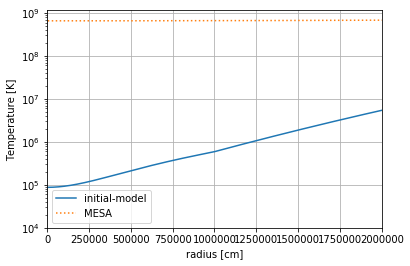

In [36]:
#data['temperature [K]'] = max(temp[::-1])*np.exp(-(data['r_center [cm]']**2)/(60000000)**2)
data['temperature [K]'] = generate_shape(max(temp[::-1]),data['r_center [cm]'])

plt.semilogy(data['r_center [cm]'],data['temperature [K]'],label='initial-model')
#plt.plot(df['r_center [cm]'],df['temperature [K]'],':',label='df')
#plt.plot(df['r_center [cm]'],df['temp'],':',label='df_temp')
#plt.plot(data['r_center [cm]'],dn['temp'],'o:',label='dn')
plt.semilogy(r_cm,temp,":",label="MESA")
plt.xlim(0e6,2e6)
plt.ylim(1.e4,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.savefig("temperature.png")

In [37]:
data.head(3)

,r_center [cm],density [g/cm3],temperature [K],pressure,neon20,oxygen16,oxygen20,magnesium24,fluorine20,helium4,aluminum27,silicon28,sulfur32,phosphorus31,hydrogen1
0,4226.946083,8.348568e+09,1.124422e+09,7.367388e+27,0.4,0.55,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4384.531853,8.348568e+09,1.124422e+09,7.367388e+27,0.4,0.55,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4459.320035,8.348568e+09,1.124422e+09,7.367388e+27,0.4,0.55,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
f = open("xinlong.raw", "w")

npts = str(data.shape[0])

header = '# npts = '+npts+'\n# num of variables = 14\n# density\n# temperature\n# pressure\n# neon-20\n# oxygen-16\n# oxygen-20\n# magnesium-24\n# fluorine-20\n# helium-4\n# aluminum-27\n# silicon-28\n# sulfur-32\n# phosphorus-31\n# hydrogen-1\n'
f.write(header)

for i in range(data.shape[0]):
    for j in data.columns:
        f.write(str(data[j][i]))
        f.write(' ')
    f.write('\n')
f.close()

In [43]:
4e8/128/2/2/5

156250.0

In [45]:
2e8/1280

156250.0